<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-полученных-данных" data-toc-modified-id="Изучение-полученных-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение полученных данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-неявными-дубликатами-GENRE" data-toc-modified-id="Работа-с-неявными-дубликатами-GENRE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с неявными дубликатами GENRE</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Сравнение-поведения-пользователей-двух-столиц" data-toc-modified-id="Сравнение-поведения-пользователей-двух-столиц-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сравнение поведения пользователей двух столиц</a></span></li><li><span><a href="#Жанровые-предпочтения-в-Москве-и-Петербурге" data-toc-modified-id="Жанровые-предпочтения-в-Москве-и-Петербурге-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Жанровые предпочтения в Москве и Петербурге</a></span></li><li><span><a href="#Музыка-в-начале-и-в-конце-недели" data-toc-modified-id="Музыка-в-начале-и-в-конце-недели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Музыка в начале и в конце недели</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоги исследования</a></span></li></ul></div>

# Яндекс.Музыка

Сравнение Москвы и Петербурга окружено мифами. Например:
 * Москва — мегаполис, подчинённый жёсткому ритму рабочей недели;
 * Петербург — культурная столица, со своими вкусами.
На основании данных полученных от команды Яндекс.Музыки необходимо провести анализ предпочтений пользователей двух столиц. 

**Цель исследования** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.


**Описание колонок:**
- `userID` — идентификатор пользователя;
- `Track` — название трека;
- `artist` — имя исполнителя;
- `genre` — название жанра;
- `City` — город пользователя;
- `time` — время начала прослушивания;
- `Day` — день недели.


## Изучение полученных данных

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt


In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('C:\Dev\Jupyter\dist\projects\yandex_music_project.csv')
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


- Необходимо поправить названия колонок, чтобы было удобнее работать, 
- поработать с пропусками в столбцах `Track`, `artist`, `genre`
- проверить дубликаты, в том числе неявные дубликаты, возможно в жанрах есть повторы, которые можно будет поправить, 


Посмотрим, какая доля пропусков у нас имеется. 


In [4]:
df.isna().mean()*100

  userID     0.000000
Track        1.891547
artist      11.068086
genre        1.840840
  City       0.000000
time         0.000000
Day          0.000000
dtype: float64

В стобце трека и жанра, таких значений не более 2%, что не так много, в столбце с именами исполнителей пропусков порядка 11 %, что немало. Пока оставляем как есть и после подумаем, что можно сделать с этими значениями. 

## Предобработка данных


In [5]:
columns_to_replace = ['track','artist', 'genre']
#функциф для приведения столбцов к единому формату и удаления дубликатов
def standart (data):

    #цикл для переименовывания столбцов 
    new_cols = []
    for i in data.columns:
        new_cols += [i.lower()]
    data.columns = new_cols 
    data.columns = data.columns.str.strip()
    
    #замена пустых строк
    for elem in columns_to_replace:
        df[elem] = df[elem].fillna('unknown')
    
    #избавляемся от дубликатов   
    if data.duplicated().sum() > 0:
        data = data.drop_duplicates().reset_index(drop =True)
    
    return data

In [6]:
df = standart (df)
print(df.columns) #для проверки
BOLD = '\033[1m'
print (BOLD  + 'Количество дубликатов:' +'\033[0m', df.duplicated().sum())


df.info()

Index(['userid', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')
Количество дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61253 entries, 0 to 61252
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userid  61253 non-null  object
 1   track   61253 non-null  object
 2   artist  61253 non-null  object
 3   genre   61253 non-null  object
 4   city    61253 non-null  object
 5   time    61253 non-null  object
 6   day     61253 non-null  object
dtypes: object(7)
memory usage: 3.3+ MB


Функция отработала корректно, дубликатов нет, наименования без пробелов и приведены к единому формату


### Работа с неявными дубликатами GENRE

In [7]:
# Просмотр уникальных названий жанров
print(df['genre'].sort_values().unique())

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'alternativepunk' 'ambient' 'americana' 'animated' 'anime' 'arabesk'
 'arabic' 'arena' 'argentinetango' 'art' 'audiobook' 'author' 'avantgarde'
 'axé' 'baile' 'balkan' 'beats' 'bigroom' 'black' 'bluegrass' 'blues'
 'bollywood' 'bossa' 'brazilian' 'breakbeat' 'breaks' 'broadway'
 'cantautori' 'cantopop' 'canzone' 'caribbean' 'caucasian' 'celtic'
 'chamber' 'chanson' 'children' 'chill' 'chinese' 'choral' 'christian'
 'christmas' 'classical' 'classicmetal' 'club' 'colombian' 'comedy'
 'conjazz' 'contemporary' 'country' 'cuban' 'dance' 'dancehall' 'dancepop'
 'dark' 'death' 'deep' 'deutschrock' 'deutschspr' 'dirty' 'disco' 'dnb'
 'documentary' 'downbeat' 'downtempo' 'drum' 'dub' 'dubstep' 'eastern'
 'easy' 'electronic' 'electropop' 'emo' 'entehno' 'epicmetal' 'estrada'
 'ethnic' 'eurofolk' 'european' 'experimental' 'extrememetal' 'fado'
 'fairytail' 'film' 'fitness' 'flamenco' 'folk' 'folklore' 'folkmetal'
 'folkrock' 

Дубликатов всего пара штук, в жанре hiphop и электроника
* *hip*,
* *hop*,
* *hip-hop*.
* *электроника*

Поменяем названия связанные с hiphop на 'hiphop' электроника на  'electronic'

In [8]:
df['genre'] = df['genre'].replace(['hip', 'hop', 'hip-hop'], 'hiphop')
df['genre'] = df['genre'].replace('электроника', 'electronic')

In [9]:
# Проверка на неявные дубликаты
print(df['genre'].sort_values().unique())

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'alternativepunk' 'ambient' 'americana' 'animated' 'anime' 'arabesk'
 'arabic' 'arena' 'argentinetango' 'art' 'audiobook' 'author' 'avantgarde'
 'axé' 'baile' 'balkan' 'beats' 'bigroom' 'black' 'bluegrass' 'blues'
 'bollywood' 'bossa' 'brazilian' 'breakbeat' 'breaks' 'broadway'
 'cantautori' 'cantopop' 'canzone' 'caribbean' 'caucasian' 'celtic'
 'chamber' 'chanson' 'children' 'chill' 'chinese' 'choral' 'christian'
 'christmas' 'classical' 'classicmetal' 'club' 'colombian' 'comedy'
 'conjazz' 'contemporary' 'country' 'cuban' 'dance' 'dancehall' 'dancepop'
 'dark' 'death' 'deep' 'deutschrock' 'deutschspr' 'dirty' 'disco' 'dnb'
 'documentary' 'downbeat' 'downtempo' 'drum' 'dub' 'dubstep' 'eastern'
 'easy' 'electronic' 'electropop' 'emo' 'entehno' 'epicmetal' 'estrada'
 'ethnic' 'eurofolk' 'european' 'experimental' 'extrememetal' 'fado'
 'fairytail' 'film' 'fitness' 'flamenco' 'folk' 'folklore' 'folkmetal'
 'folkrock' 

 Данные приведены к единому формату,дубликаты удалены, наименования столбцов приведены к единому стилю, пропущенных строк нет, 
 можем приступить к исследованию данных

## Исследовательский анализ данных

- Посмотрим топ-10 жанров, которые встречаются в нашем датасете чаще всего, 
- Проверить  в какие дни больше всего прослушиваний, в разрезе двух столиц, 
- Проверить преобладание жанров в каждом из городов по дням недели


### Сравнение поведения пользователей двух столиц

**GENRE**

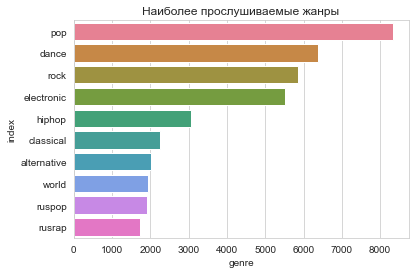

In [32]:
sns.barplot(x = 'genre', y = 'index' , data = df['genre'].value_counts().head(10).reset_index(), palette ='husl'
           ).set_title('Наиболее прослушиваемые жанры');

**CITY - DAY**

In [11]:
df.pivot_table(index = 'city', columns ='day' , values ='track', aggfunc ='count')

day,Friday,Monday,Wednesday
city,,,
Moscow,15945,15740,11056
Saint-Petersburg,5895,5614,7003


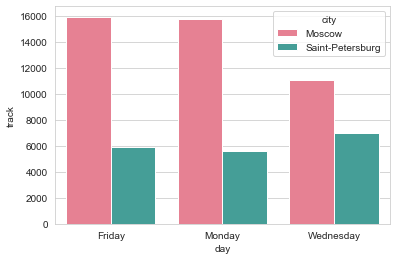

In [55]:
sns.barplot(x = 'day', y = 'track', hue = 'city',
            data = df.pivot_table(index = ['city', 'day'], values ='track', aggfunc ='count').reset_index(),  palette ='husl');

- Больше всего прослушиваний в Москве, более чем в 2 раза, но следует отметить, что Москва как мегаполис гораздо густонаселенее, в сравнении с Санкт-Петерербургом. Т.е. пользователей в Москве больше, чем в Санкт-Петербурге. 

- Больше всего прослушиваний, в конце недели (в пятницу), также жители столицы любят начать рабочую неделю (понедельник) с музыки ❤️. Данная тенденция не характерна для Санкт-Петербурга, количество прослушиваний в среду выше, в сравнении с остальными днями.



### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

In [13]:
#топ-10 жаноров в Москве
top_10 = df.query('city == "Moscow"').pivot_table(index = 'genre',values = 'track',
                        aggfunc ='count').sort_values(by = 'track', ascending = False).head(10).reset_index()

top_10= top_10['genre'].unique()
top_10

array(['pop', 'dance', 'rock', 'electronic', 'hiphop', 'classical',
       'world', 'alternative', 'ruspop', 'rusrap'], dtype=object)

Поскольку топ-10 для Москвы такой же,  как и на общих данных, то он будет справедлив и для Санкт-Петербурга, создадим сводную таблицу, оставив только необходимые столбцы для просмотра количества треков по городам и дням недели. Построенную сводную таблицу, применим для построения графика. 

**GENRE - DAY - CITY**

In [14]:
research = df.query('genre in @top_10').pivot_table(index = ['genre', 'day', 'city'], values = 'track', 
                    aggfunc = 'count').reset_index()


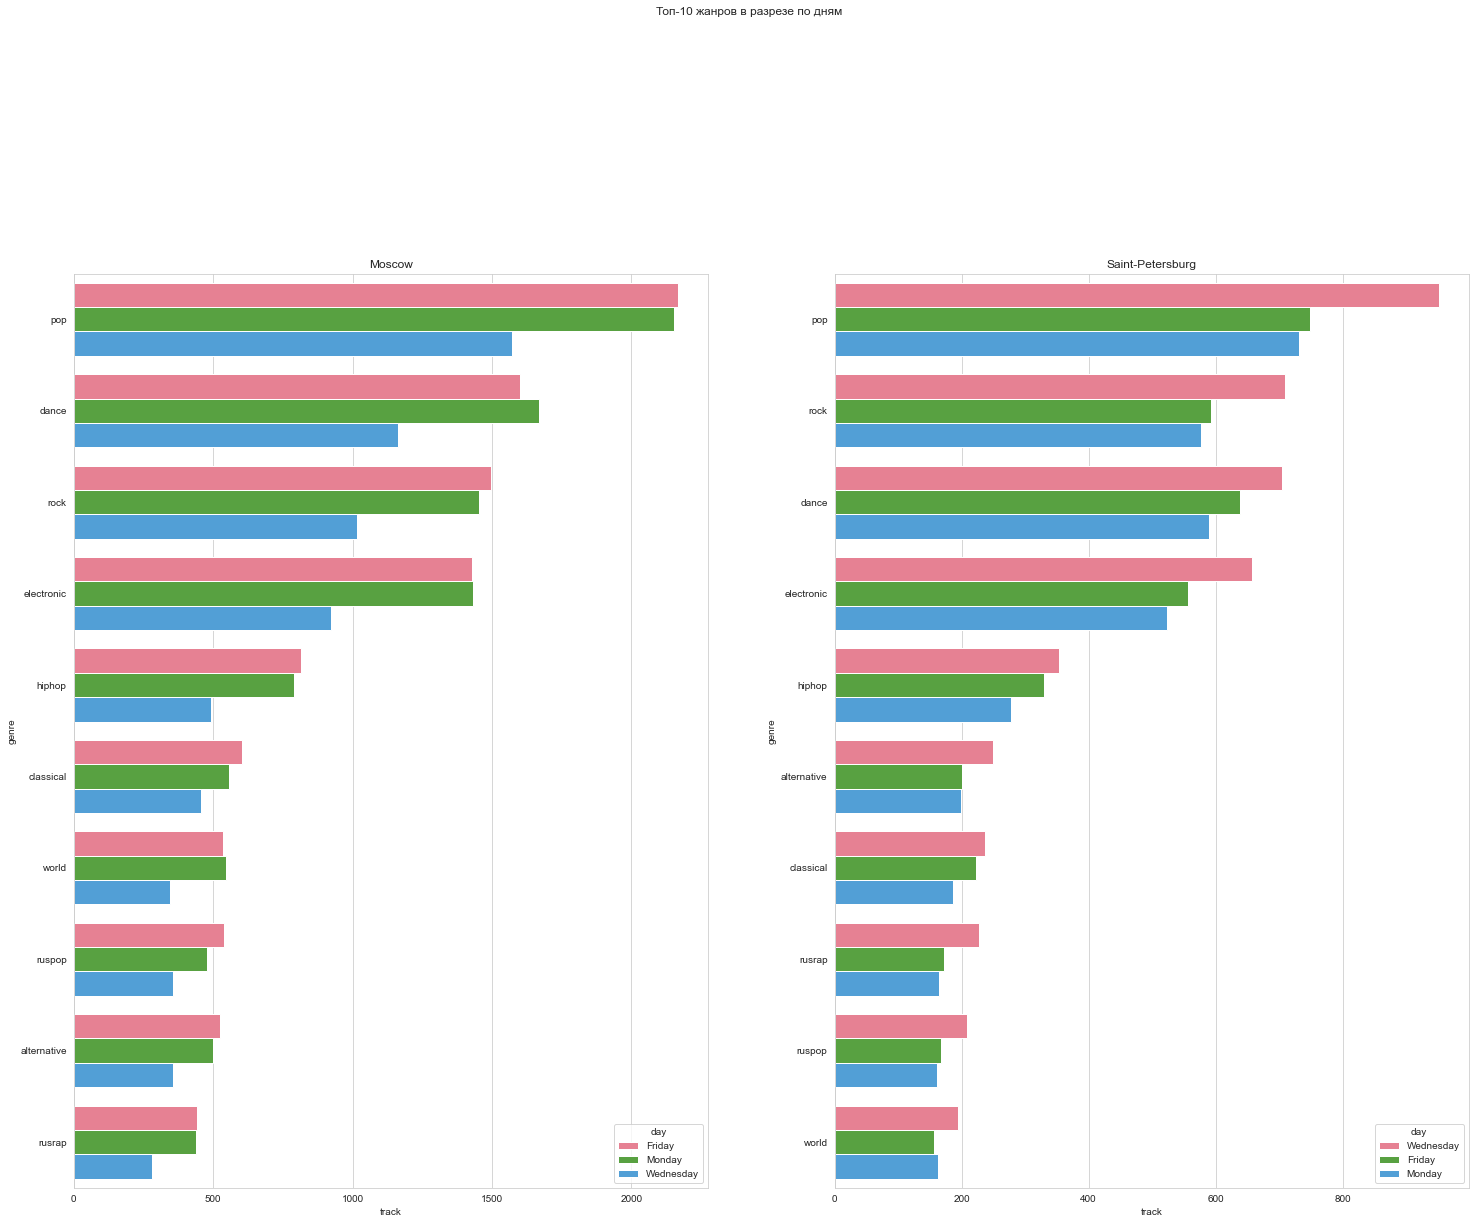

In [15]:
#График топ-10 жанров по городам, дням
col_count, row_count = 2,2
plt.figure(figsize = (25,37))

for i, town in enumerate (research['city'].unique()):
    data_ft = research.query('city == @town') 
    sns.barplot(x = 'track', y = 'genre' , hue = 'day', 
                    data = data_ft.sort_values(by =['track', 'day'], ascending = False), 
                palette = 'husl',
            
                ax = plt.subplot (row_count, col_count, i+1))

    plt.title(town)
    
plt.suptitle('Топ-10 жанров в разрезе по дням');
       

В предпочтениях жанров есть неольшие различия, но в целом, топ -10 для обоих городов одинаковый. 
Предпочтнеения отдается поп жанру в обоих городах, далее топ-3 немного перетасован. 
В Санкт-Петербурге, предпочтения отдают року и танцевальным жанрам, тогда как в Москве это танцевальный жанр и потом рок.


**Москва**

* большинство московских пользователей заканчивают неделю прослушиванием поп-музыки, также как и начинают неделю. Этот жанр больше всего преобладает в прослушиваемых композициях пользователей, 

* следующая по популяности танцевальная музыка, с нее начинают неделю и ее продолжают слушать в пятницу, 

* по жанрам тенденция по прослушиванию по дням недели сохраняется, чаще всего пользователи слушают музыку в пятницу, реже в среду, 

* в понедельник в сравнении с пятницей, преобладает прослушивание танцевального жана, но незначительно, 

**Санкт-Петербуг**

* поп музыка в культурной столице чаще всего слушается в среду,

* рок и танцевальная музыка также популярны по средам, 

* в целом среди питерских пользователей чаще всего треки слушаются по средам,

* для пятницы характернее рок, поп и танцевальная, электроника, хип-хоп и классические жарны музыки.


Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 

### Музыка в начале и в конце недели

Согласно гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Создадим две переменные с таблицами: 
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

После чего пишу функцию `genre_weekday()` с четырьмя параметрами:
* таблица с данными,
* день недели,
* начальная временная метка в формате 'hh:mm', 
* последняя временная метка в формате 'hh:mm'.

Функция должна возвращать  информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

In [16]:
# получение таблицы moscow_general из тех строк таблицы df, 
# для которых значение в столбце 'city' равно 'Moscow'
moscow_general = df[df['city'] == 'Moscow']


,userid,track,artist,genre,city,time,day
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,unknown,ruspop,Moscow,09:17:40,Friday
...,...,...,...,...,...,...,...
61247,83A474E7,I Worship Only What You Bleed,The Black Dahlia Murder,extrememetal,Moscow,21:07:12,Monday
61248,729CBB09,My Name,McLean,rnb,Moscow,13:32:28,Wednesday
61250,C5E3A0D5,Jalopiina,unknown,industrial,Moscow,20:09:26,Friday
61251,321D0506,Freight Train,Chas McDevitt,rock,Moscow,21:43:59,Friday


In [17]:
# получение таблицы spb_general из тех строк таблицы df,
# для которых значение в столбце 'city' равно 'Saint-Petersburg'
spb_general = df[df['city'] == 'Saint-Petersburg']


In [18]:

def genre_weekday(table, day, time1, time2):
    genre_df = table[table['day'] == day]
    genre_df = genre_df[genre_df['time'] > time1]
    genre_df = genre_df[genre_df['time'] < time2]
    genre_df_count = genre_df.groupby('genre')['userid'].count()
    genre_df_sorted = genre_df_count.sort_values(ascending=False).reset_index()
    genre_df_sorted.columns = ['genre' , 'counted']
    return genre_df_sorted.head(10)

        
    

# 1) в переменную genre_df сохраняются те строки переданного датафрейма table, для
#    которых одновременно:
#    - значение в столбце day равно значению аргумента day
#    - значение в столбце time больше значения аргумента time1
#    - значение в столбце time меньше значения аргумента time2
#    Используйте последовательную фильтрацию с помощью логической индексации.
# 2) сгруппировать датафрейм genre_df по столбцу genre, взять один из его
#    столбцов и посчитать методом count() количество записей для каждого из
#    присутствующих жанров, получившийся Series записать в переменную
#    genre_df_count
# 3) отсортировать genre_df_count по убыванию встречаемости и сохранить
#    в переменную genre_df_sorted
# 4) вернуть Series из 10 первых значений genre_df_sorted, это будут топ-10
#    популярных жанров (в указанный день, в заданное время)

In [19]:
# вызов функции для утра понедельника в Москве (вместо df — таблица moscow_general)
# объекты, хранящие время, являются строками и сравниваются как строки
print (BOLD  + 'Количество прослушиваний с 7 - 11  в Москве в понедельник:' +'\033[0m')

genre_weekday(moscow_general, 'Monday', '07:00', '11:00')


Количество прослушиваний с 7 - 11  в Москве в понедельник:


,genre,counted
0,pop,781
1,dance,549
2,electronic,480
3,rock,474
4,hiphop,286
5,ruspop,186
6,world,181
7,rusrap,175
8,alternative,164
9,unknown,161


In [20]:
# вызов функции для утра понедельника в Петербурге (вместо df — таблица spb_general)
print (BOLD  + 'Количество прослушиваний с 7 - 11  в Санкт-Петербурге в понедельник:' +'\033[0m')
genre_weekday(spb_general, 'Monday', '07:00', '11:00')


Количество прослушиваний с 7 - 11  в Санкт-Петербурге в понедельник:


,genre,counted
0,pop,218
1,dance,182
2,rock,162
3,electronic,147
4,hiphop,80
5,ruspop,64
6,alternative,58
7,rusrap,55
8,jazz,44
9,classical,40


In [21]:
# вызов функции для вечера пятницы в Москве
print (BOLD  + 'Количество прослушиваний с 17 - 23 в Москве, в пятницу:' +'\033[0m')

genre_weekday(moscow_general, 'Friday', '17:00', '23:00')

Количество прослушиваний с 17 - 23 в Москве, в пятницу:


,genre,counted
0,pop,713
1,rock,517
2,dance,495
3,electronic,482
4,hiphop,273
5,world,208
6,ruspop,170
7,alternative,163
8,classical,163
9,rusrap,142


In [22]:
# вызов функции для вечера пятницы в Петербурге
print (BOLD  + 'Количество прослушиваний с 17 - 23 в Санкт-Петербурге, в пятницу:' +'\033[0m')
genre_weekday(spb_general, 'Friday', '17:00', '23:00')

Количество прослушиваний с 17 - 23 в Санкт-Петербурге, в пятницу:


,genre,counted
0,pop,256
1,electronic,216
2,rock,216
3,dance,210
4,hiphop,97
5,alternative,63
6,jazz,61
7,classical,60
8,rusrap,59
9,world,54


### Промежуточные выводы

В понедельник утром помогает проснуться треки из жанра поп и танцевального, для обеих столиц.
Следующая по популярности для Москвы электронная музыка, для Санкт-Петербурга рок. 

В вечер пятницы по прежнему, как для московской, так и для питерской аудитории характено прослушивание музыки из жанра поп. Далее по популярности имеются различия, в Москве прослушиваний больше в жанре рок и танцевальной музыки. Для Петербурга характерно прослушивание электронной и рок музыки. 

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования. 

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

## Итоги исследования

Проверка всех трех гипотез показала: 

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Гипотеза подтвердилась, количество прослушиваний по разному распределено в городах по дням. 
Для Москвы количество прослушиваний выше  в понедельник, 
для Санкт-Петербурга в среду

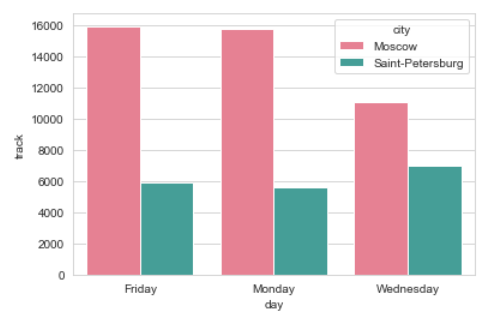

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

